In [5]:
pip install --upgrade tensorflow

In [6]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization, LeakyReLU
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
import matplotlib.pyplot as plt
#use RobustScaler for normalization
from sklearn.preprocessing import RobustScaler
# use for learning rate schedular
from tensorflow.keras.callbacks import ReduceLROnPlateau
#for early stopping
from tensorflow.keras.callbacks import EarlyStopping
#for l2 regularization
from tensorflow.keras.regularizers import l2
from collections import Counter
from sklearn.preprocessing import LabelEncoder

import time
import os

In [7]:

df = pd.read_csv(r'C:\Users\Pranav Desai\Desktop\Chronic Disease\Augmented kidney_dataset.csv')

In [8]:
x = df.drop("classification", axis=1).values
y = df["classification"].values


In [9]:
scaler = RobustScaler()
x_scaled = scaler.fit_transform(x)

In [10]:
x_train, x_test, y_train, y_test = train_test_split(x_scaled, y, test_size=0.2, random_state=42, stratify=y)

In [11]:
scaler = RobustScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [12]:
df.head()

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,45,80,1.025,0,0,1,1,0,0,82,...,46,9100,4.7,0,0,0,0,0,0,1
1,33,80,1.025,0,0,1,1,0,0,100,...,52,6700,6.0,0,0,0,0,0,0,1
2,5,50,1.010,0,0,1,1,0,0,121,...,36,12400,4.8,0,0,0,0,0,0,0
3,44,60,1.020,0,0,1,1,0,0,95,...,50,7700,6.3,0,0,0,0,0,0,1
4,54,60,1.020,3,0,1,1,0,0,125,...,46,8000,4.8,1,1,0,0,1,0,0


In [13]:
model = Sequential([
    Dense(256, kernel_regularizer=l2(0.001), input_shape=(x_train.shape[1],)),  # Increased neurons
    LeakyReLU(alpha=0.1),
    BatchNormalization(),
    Dropout(0.2),

    Dense(128, kernel_regularizer=l2(0.001)),
    LeakyReLU(alpha=0.1),
    BatchNormalization(),
    Dropout(0.2),

    Dense(64, kernel_regularizer=l2(0.001)),
    LeakyReLU(alpha=0.1),
    BatchNormalization(),
    Dropout(0.2),


    Dense(32, kernel_regularizer=l2(0.001)),
    LeakyReLU(alpha=0.1),
    BatchNormalization(),
    Dropout(0.2),

    Dense(1, activation='sigmoid')  # Output layer for binary classification
])

In [14]:

optimizer = Adam(learning_rate=0.0001)

model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

lr_scheduler = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, min_lr=0.001)
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)


In [15]:

history = model.fit(x_train, y_train, epochs=75, batch_size=50, validation_data=(x_test, y_test),callbacks=[early_stopping], verbose=1)


Epoch 1/75
160/160 [==============================] - 3s 11ms/step - loss: 0.8262 - accuracy: 0.7726 - val_loss: 0.6806 - val_accuracy: 0.9640
Epoch 2/75
160/160 [==============================] - 2s 11ms/step - loss: 0.5296 - accuracy: 0.9386 - val_loss: 0.4619 - val_accuracy: 0.9835
Epoch 3/75
160/160 [==============================] - 2s 10ms/step - loss: 0.4552 - accuracy: 0.9676 - val_loss: 0.3986 - val_accuracy: 0.9950
Epoch 4/75
160/160 [==============================] - 2s 10ms/step - loss: 0.4162 - accuracy: 0.9826 - val_loss: 0.3720 - val_accuracy: 1.0000
Epoch 5/75
160/160 [==============================] - 2s 10ms/step - loss: 0.3921 - accuracy: 0.9877 - val_loss: 0.3559 - val_accuracy: 1.0000
Epoch 6/75
160/160 [==============================] - 2s 11ms/step - loss: 0.3792 - accuracy: 0.9893 - val_loss: 0.3438 - val_accuracy: 1.0000
Epoch 7/75
160/160 [==============================] - 2s 11ms/step - loss: 0.3643 - accuracy: 0.9902 - val_loss: 0.3353 - val_accuracy: 1.0000

In [16]:
test_loss, test_accuracy = model.evaluate(x_test, y_test)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")


63/63 [==============================] - 0s 4ms/step - loss: 0.0342 - accuracy: 1.0000
Test Accuracy: 100.00%


In [17]:
x_train_pca = np.array(x_train)
y_train = np.array(y_train)
train_loss, train_accuracy = model.evaluate(x_train_pca, y_train)
print(f"Train Accuracy: {train_accuracy * 100:.2f}%")

250/250 [==============================] - 1s 4ms/step - loss: 0.0342 - accuracy: 1.0000
Train Accuracy: 100.00%


In [18]:
 #train 83.93% test 86.97%
# increases train 84.14% test 85.71% after RobustScaler normalization of data
# after making dropot 0.2 the accuracy train 86.24% test 84.45%
# after making epoch 100 train 83.51% test 84.87%
# after making learning 0.001 train 84.66% test 85.29%
# after making dropout 0.001 and epoch 75 and batch size 16 train 87.50%  test 86.13%
# after making epoch 100 and batch size 32 train 88.45% test 87.82%
# after making epoch 75 and learning rate 0.001 train 89.60% test 88.66%
# after using leakyrelu and making epoch 75 and batch size 16 train  87.18% test 87.82%

In [19]:
y_pred = model.predict(x_test)
y_pred_labels = (y_pred > 0.5).astype(int)

print("Accuracy:", accuracy_score(y_test, y_pred_labels))
print(classification_report(y_test, y_pred_labels))

Accuracy: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1250
           1       1.00      1.00      1.00       750

    accuracy                           1.00      2000
   macro avg       1.00      1.00      1.00      2000
weighted avg       1.00      1.00      1.00      2000



In [20]:

# Extract values from history
loss = history.history['loss']
val_loss = history.history['val_loss']
accuracy = history.history.get('accuracy', history.history.get('acc'))  # Some versions use 'acc'
val_accuracy = history.history.get('val_accuracy', history.history.get('val_acc'))

epochs = range(1, len(loss) + 1)


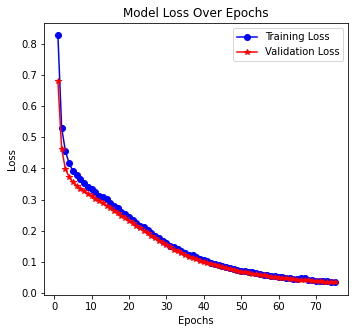

In [21]:
# Plot Loss
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(epochs, loss, 'bo-', label='Training Loss')
plt.plot(epochs, val_loss, 'r*-', label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Model Loss Over Epochs')
plt.legend()


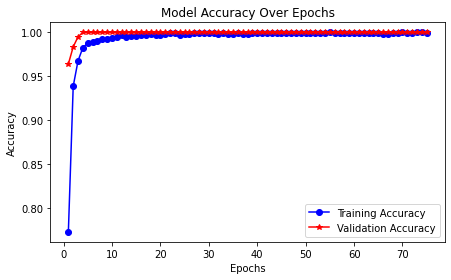

In [22]:
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 2)
plt.plot(epochs, accuracy, 'bo-', label='Training Accuracy')
plt.plot(epochs, val_accuracy, 'r*-', label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Model Accuracy Over Epochs')
plt.legend()

plt.tight_layout()
plt.show()

In [23]:
import tensorflow as tf
import os
import time
from tensorflow.python.framework.convert_to_constants import convert_variables_to_constants_v2
from tensorflow.python.profiler import model_analyzer
from tensorflow.python.profiler.option_builder import ProfileOptionBuilder

def evaluate_model_metrics(model, x_test, y_test, model_name="model_metrics"):
    results = {}

    # Total Parameters
    results['total_parameters'] = model.count_params()

    # FLOPs Calculation
    func = tf.function(lambda x: model(x))
    concrete_func = func.get_concrete_function(
        tf.TensorSpec([1] + list(model.input_shape[1:]), model.inputs[0].dtype)
    )
    frozen_func = convert_variables_to_constants_v2(concrete_func)
    flops = model_analyzer.profile(
        graph=frozen_func.graph,
        options=ProfileOptionBuilder.float_operation()
    ).total_float_ops
    results['FLOPs'] = flops
    results['GFLOPs'] = flops / 1e9

    # Model Size
    model_path = f"{model_name}.h5"
    model.save(model_path)
    size_bytes = os.path.getsize(model_path)
    results['model_size_bytes'] = size_bytes
    results['model_size_MB'] = size_bytes / (1024 * 1024)

    # Inference Time
    start = time.time()
    model.predict(x_test)
    end = time.time()
    results['inference_time_seconds'] = end - start

    # Accuracy
    loss, acc = model.evaluate(x_test, y_test, verbose=0)
    results['accuracy'] = acc

    return results
evaluate_model_metrics(model, x_test, y_test, model_name="model_metrics")



Instructions for updating:
Use `tf.compat.v1.graph_util.tensor_shape_from_node_def_name`


{'total_parameters': 51585,
 'FLOPs': 101729,
 'GFLOPs': 0.000101729,
 'model_size_bytes': 704736,
 'model_size_MB': 0.672088623046875,
 'inference_time_seconds': 0.11760878562927246,
 'accuracy': 1.0}